# 🔊 Working with Audio in Python

<img src="https://miro.medium.com/max/1100/1*Zx9QAMPzxhama9O4q9xWXg.jpeg" width="600"/>

This notebook is intended to be an introduction for anyone interested in using python to interperate audio data.

Please watch the youtube video that discusses the contents of this notebook if you want to learn more!
- [Video Link](https://www.youtube.com/watch?v=ZqpSb5p1xQo)
- [Youtube Channel](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw)

# Imports

In [1]:
#!pip install librosa

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     -------------------------------------- 214.3/214.3 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 377.0/377.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 56.3/56.3 kB 293.1 kB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 3.2 MB/s eta 0:00:00
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23703 sha256=c156dbe122de17f796a6b49b56bc8b415dfb7925c9e4d31833a4fc250016bed2
  Stored in directory: c:\users\86183\appdata\local\pip\cache\wheels\22\e0\32\e08f69520112f7e567f2d628157295102dd6ccae0a49e6f650
Successfully built audioread


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

C:\Users\86183\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Reading in Audio Files
There are many types of audio files: `mp3`, `wav`, `m4a`, `flac`, `ogg`

In [3]:
audio_files = glob('../data/*.wav')

In [4]:
# Play audio file
ipd.Audio(audio_files[0])

In [5]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 1.6517616e-08 -6.5464434e-08  1.2522355e-07 -1.9278477e-07
  2.6331836e-07 -3.3016912e-07  3.8501304e-07 -4.1818913e-07
  4.1913367e-07 -3.7683319e-07]
shape y: (72838,)
sr: 22050


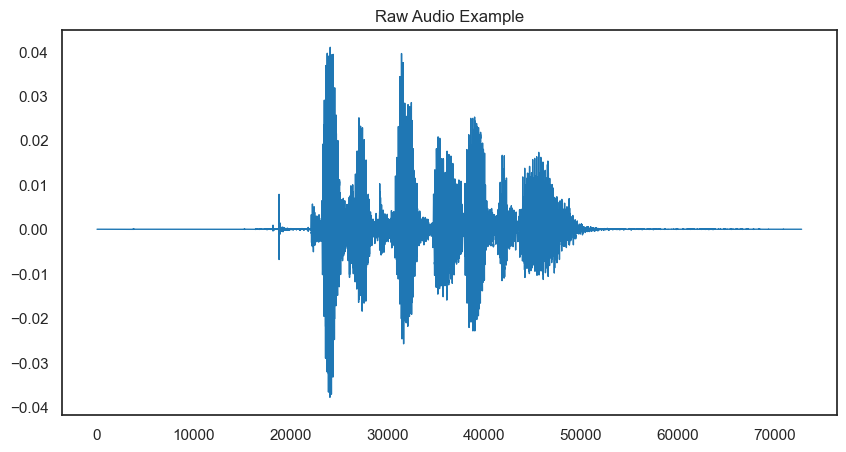

In [6]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                  color=color_pal[0])
plt.show()

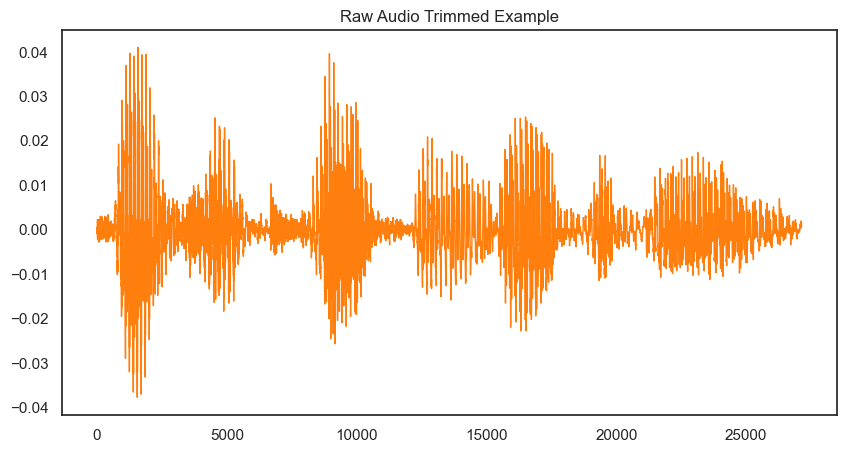

In [7]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

pd.Series(y_trimmed).plot(figsize=(10, 5),
                          lw=1,
                          title='Raw Audio Trimmed Example',
                          color=color_pal[1])
plt.show()

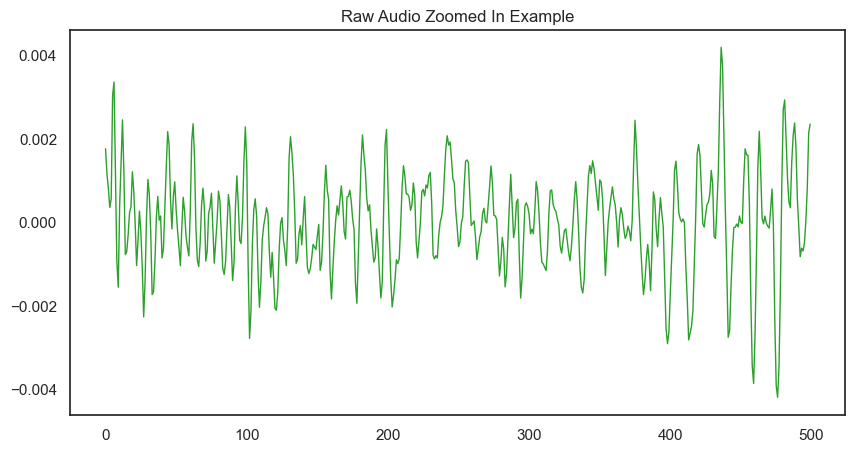

In [8]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                               lw=1,
                               title='Raw Audio Zoomed In Example',
                               color=color_pal[2])
plt.show()

# Spectogram

In [9]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

S_db.shape

(1025, 143)

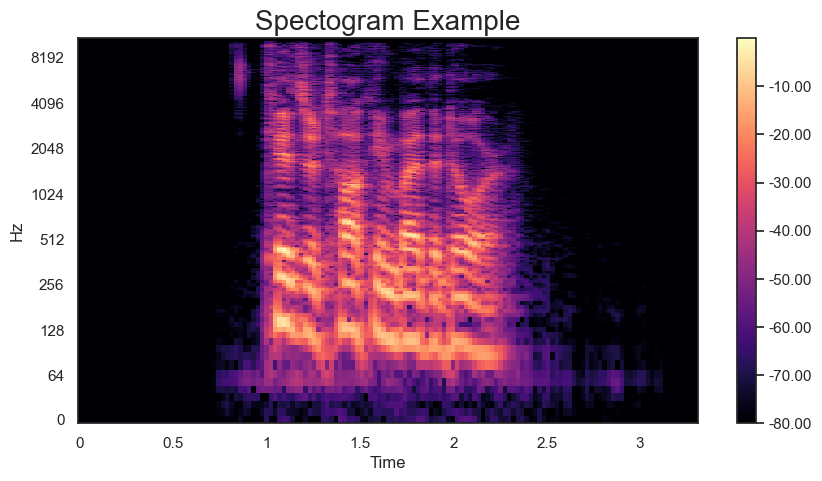

In [10]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))

img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)

ax.set_title('Spectogram Example', fontsize=20)

fig.colorbar(img, ax=ax, format=f'%0.2f')

plt.show()

# Mel Spectogram

In [11]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

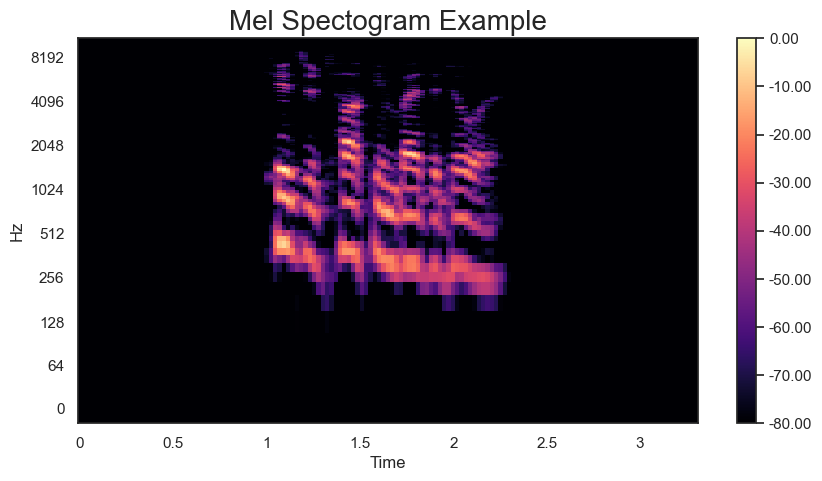

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)

ax.set_title('Mel Spectogram Example', fontsize=20)

fig.colorbar(img, ax=ax, format=f'%0.2f')

plt.show()